Project

Broad Question: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.
Specific Question: Can gender and age predict a player's hours played?

In [1]:
#loading in packages and datasets
library(tidyverse)
player_data <- read_csv("https://raw.githubusercontent.com/nyue324/Dsci100-project/refs/heads/main/players.csv")
session_data <- read_csv("https://raw.githubusercontent.com/nyue324/Dsci100-project/refs/heads/main/sessions.csv")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

The players dataset consists of 7 variables and 196 total observations. These 7 variables include:

    -experience (chr): How familiar the player is with the game

    -subscribe (lgl): Whether or not the player is subscribed to a newsletter

    -hashedEmail (chr): Player's email

    -played_hours (dbl): Time spent playing

    -name (chr): Player name

    -gender (chr): Player gender

    -Age (dbl): Player age

The sessions dataset consists of 5 variables and 1535 observations. These 5 variables include:

    -hashedEmail (chr): Player's email

    -start_time (chr): Start time of session

    -end_time (chr): End time of session

    -original_start_time (dbl): Different format of starting date and time

    -original_end_time (dbl): Different format of ending date and time

In [2]:
#Summary for mean values of variables
player_data_avg <- player_data |>
summarize(avg_hours = mean(played_hours),avg_age = mean(Age, na.rm=TRUE))
player_data_avg

avg_hours,avg_age
<dbl>,<dbl>
5.845918,20.52062


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


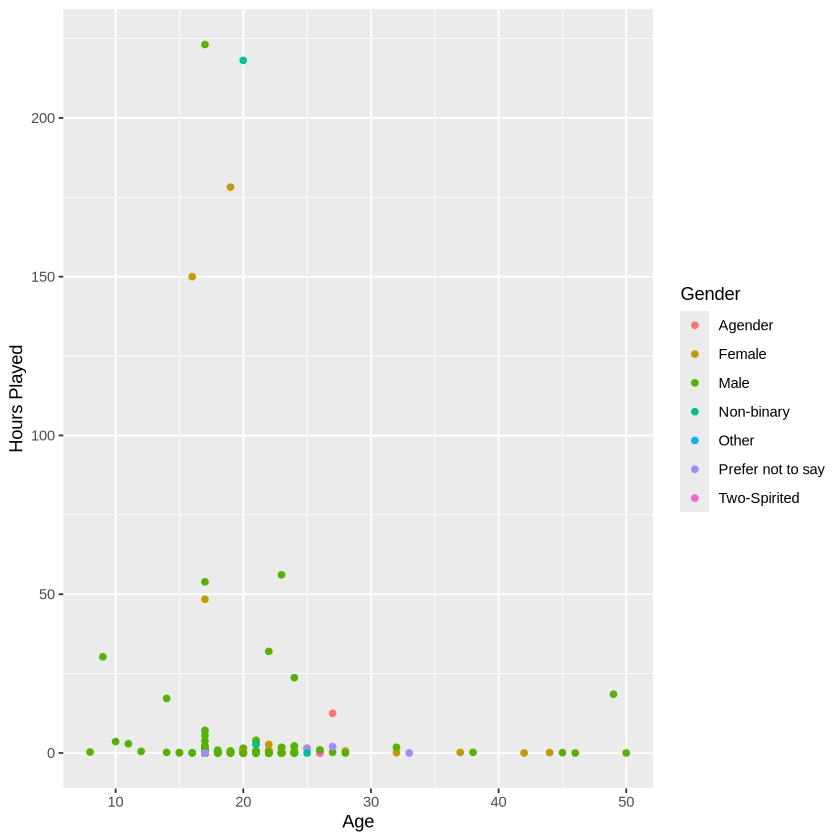

In [3]:
graph1 <- player_data |>
ggplot(aes(x = Age, y = played_hours, color = gender)) +
  geom_point() + 
  labs(x = "Age", y = "Hours Played", color = "Gender")
graph1

The above plot is useful for visualizing hours played compared to age and categorizing the players by gender. A potential problem I'm expecting to encounter is that there doesn't seem to be much of a pattern between the predictors and the response variable. Another potential problem is that there are genders that have little data associated with them since they have less people identifying with them. This could cause inaccuracy with prediction if a new observation is made with that gender.

Why is this Method Appropriate?
Multiple linear regression is suitable because:

Interpretability: Provides clear insights into how age and gender affect hours played.
Efficiency: Computationally simple and performs well with moderate sample sizes.
Continuous Outcome: Since "hours played" is a continuous variable, regression is an appropriate modeling choice.

Assumptions Required for Linear Regression
To ensure valid inference, multiple linear regression requires the following assumptions:

Linearity: The relationship between predictors (age, gender) and hours played should be approximately linear.


Potential Limitations or Weaknesses of This Method:

Linear Assumption: If the true relationship is non-linear, linear regression may not capture it well.
Only accounts for 2 variables: The model only considers age and gender; additional factors might be relevant.
Outliers: Extreme values could distort the model


Model Comparison and Selection
To assess the model’s performance, I will use:


Root Mean Squared Error (RMSE): Measures accuracy of predictions

Data Splitting Strategy:

75/25 train-test split: 75% of data for training, 25% for testing.
This ensures the model generalizes well without overfitting.
I will stratify by gender (if imbalanced) to maintain representative distribution.
Cross-Validation:

I will use 5-fold cross-validation on the training set to tune the model

